In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import anderson, shapiro,kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [2]:
df = pd.read_csv('Fish_dataset.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.shape

(159, 7)

In [4]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [6]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Bar Chart for showing individual count of species

In [7]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:>

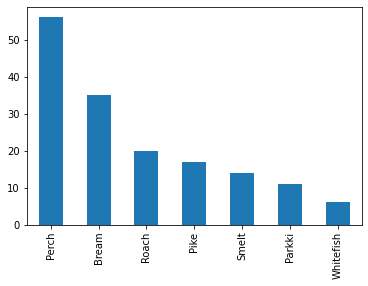

In [8]:
df["Species"].value_counts().plot(kind='bar')

### Identifying Outliers using Boxplot

<AxesSubplot:xlabel='Width'>

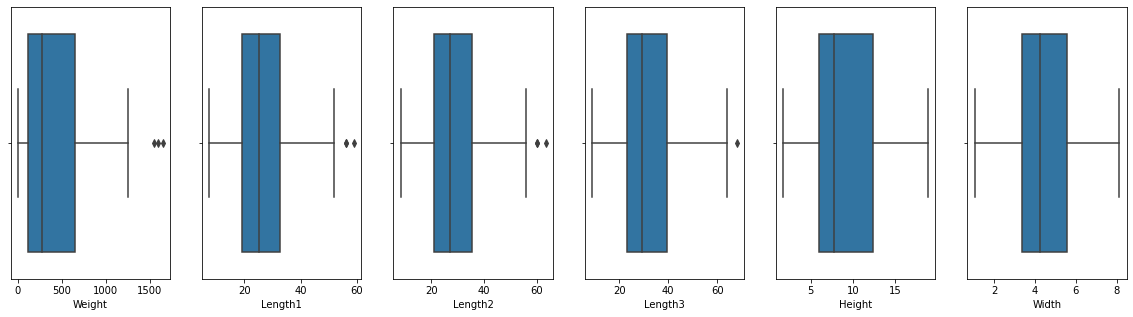

In [9]:
f,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6,figsize=(20,5))
sns.boxplot(data=df,x="Weight",ax=ax1)
sns.boxplot(data=df,x="Length1",ax=ax2)
sns.boxplot(data=df,x="Length2",ax=ax3)
sns.boxplot(data=df,x="Length3",ax=ax4)
sns.boxplot(data=df,x="Height",ax=ax5)
sns.boxplot(data=df,x="Width",ax=ax6)

In [10]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
y = df["Weight"]

In [12]:
results1 = anderson(y)
tmp = pd.DataFrame(columns=["Statistic","Critical_value","Significance_level"])

In [13]:
tmp["Critical_value"] = results1.critical_values
tmp["Significance_level"] = results1.significance_level
tmp["Statistic"] = results1.statistic
tmp["Significant"] = tmp["Statistic"] < tmp["Critical_value"]
tmp 

,Statistic,Critical_value,Significance_level,Significant
0,5.634848,0.562,15.0,False
1,5.634848,0.641,10.0,False
2,5.634848,0.768,5.0,False
3,5.634848,0.896,2.5,False
4,5.634848,1.066,1.0,False


<AxesSubplot:xlabel='Weight', ylabel='Density'>

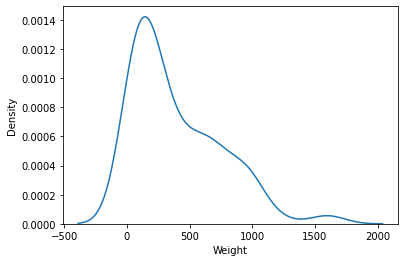

In [14]:
sns.kdeplot(y)

In [15]:
_,p = shapiro(y)
if p<0.05:
    print("Normally distributed")
else:
    print("Not Normally Distributed")

Normally distributed


In [16]:
kstest(y,'norm')

KstestResult(statistic=0.9937106900063916, pvalue=0.0)

In [17]:
z = df["Height"]

In [18]:
results2 = anderson(z)
tmp1 = pd.DataFrame(columns=["Statistic","Critical_value","Significance_level"])

In [19]:
tmp1["Critical_value"] = results2.critical_values
tmp1["Significance_level"] = results2.significance_level
tmp1["Statistic"] = results2.statistic
tmp1["Significant"] = tmp1["Statistic"] < tmp1["Critical_value"]
tmp1 

,Statistic,Critical_value,Significance_level,Significant
0,2.084092,0.562,15.0,False
1,2.084092,0.641,10.0,False
2,2.084092,0.768,5.0,False
3,2.084092,0.896,2.5,False
4,2.084092,1.066,1.0,False


<AxesSubplot:xlabel='Height', ylabel='Density'>

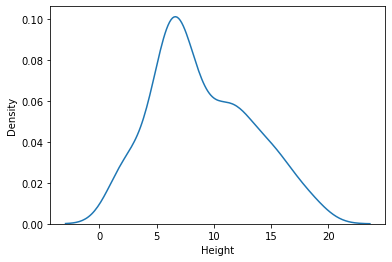

In [20]:
sns.kdeplot(z)

In [21]:
_,p = shapiro(y)
if p<0.05:
    print("Normally distributed")
else:
    print("Not Normally Distributed")

Normally distributed


In [22]:
kstest(z,'norm')

KstestResult(statistic=0.9631165803885351, pvalue=2.67416086438439e-228)

In [23]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


### Regression Model

In [24]:
### Univariate Analysis

def box_kde_plot(data = None,feature=None):
    if data is not None and feature is not None:
        f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
        sns.boxplot(data = data,ax=ax1,y=feature)
        sns.kdeplot(data = data,ax=ax2,x=feature)
        plt.show()
    else:
        print("Please provide data and feature")

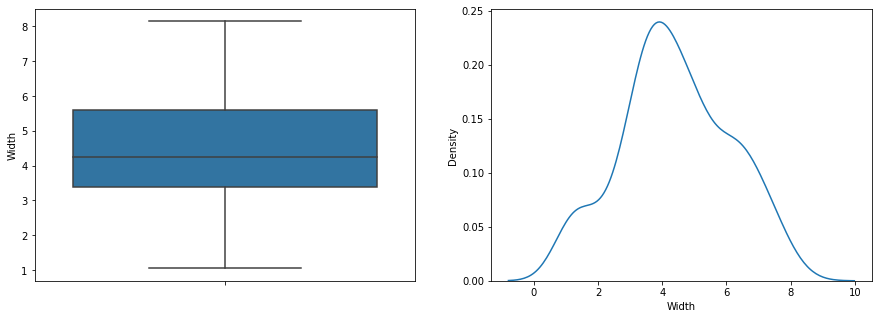

In [25]:
box_kde_plot(data = df,feature = 'Width')

In [26]:
def univariate_outlier_list(data= None,feature=None):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3-q1
    inner = q1 - 1.5*iqr
    outer = q3 + 1.5*iqr
    out = []
    for i,j in data[feature].iteritems():
        if j < inner or j > outer:
            out.append(i)

    return data[feature][out]


In [27]:
univariate_outlier_list(data = df,feature = 'Width')

Series([], Name: Width, dtype: float64)

In [28]:
df.Species = df.Species.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  159 non-null    category
 1   Weight   159 non-null    float64 
 2   Length1  159 non-null    float64 
 3   Length2  159 non-null    float64 
 4   Length3  159 non-null    float64 
 5   Height   159 non-null    float64 
 6   Width    159 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 8.1 KB


In [29]:
idv=df[['Species','Length1','Length2','Length3','Height','Width']]
idv.head()

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340


In [30]:
idv_c=idv[['Species']]
idv_c.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [31]:
idv_n=idv.iloc[:,1:]
idv_n.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [32]:
dv=df.iloc[:,1]
dv.head()


0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [33]:
both=df.iloc[:,1:]
both.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


<AxesSubplot:xlabel='Weight', ylabel='Density'>

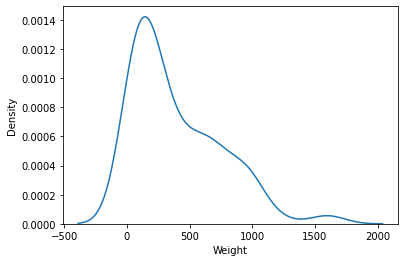

In [34]:
sns.kdeplot(dv)

In [35]:
for i in idv_n:
    r,p=pearsonr(dv,idv_n[i])
    print(i,r,p)
    if p>0.05:
        print("Not Significant.")
    else:
        print("Significant.")
        print()

Length1 0.9157117160312039 4.749619722768888e-64
Significant.

Length2 0.9186177013642214 3.3951132290325303e-65
Significant.

Length3 0.9230435593620121 5.0231914543036444e-67
Significant.

Height 0.7243453291993318 3.8423418389517936e-27
Significant.

Width 0.8865066052433448 2.0381946411853594e-54
Significant.



In [36]:
both.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

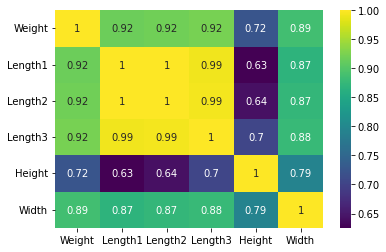

In [37]:
sns.heatmap(both.corr(),annot=True,cmap="viridis")

In [38]:
### Shapiro Test
from scipy.stats import anderson,shapiro,kstest
from scipy import stats
shapiro_test = stats.shapiro(dv)
shapiro_test


ShapiroResult(statistic=0.8834666609764099, pvalue=7.605901464202702e-10)

In [39]:
s,p=shapiro(dv)
if p>0.05:
    print("normally distributed")
else:
    print("Not normally distributed")

Not normally distributed


In [40]:
for i in idv_n:
    for j in idv_n:
        r,p = pearsonr(idv_n[i],idv_n[j])
        print(f'{i} and {j} ------> {r},{p}')
        if p>0.05:
            print("Not Significant.")
        else:
            print("Significant.")
        print()

Length1 and Length1 ------> 1.0,0.0
Significant.

Length1 and Length2 ------> 0.9995172657489308,1.2508857741606774e-238
Significant.

Length1 and Length3 ------> 0.9920309933444474,3.64503276033582e-143
Significant.

Length1 and Height ------> 0.6253779191601657,1.230263724149493e-18
Significant.

Length1 and Width ------> 0.8670497200958205,2.2892901129507837e-49
Significant.

Length2 and Length1 ------> 0.9995172657489308,1.2508857741606774e-238
Significant.

Length2 and Length2 ------> 1.0,0.0
Significant.

Length2 and Length3 ------> 0.994102634753118,2.1511433096243792e-153
Significant.

Length2 and Height ------> 0.640440801013453,9.89365130045729e-20
Significant.

Length2 and Width ------> 0.8735466773551014,5.845981819561168e-51
Significant.

Length3 and Length1 ------> 0.9920309933444474,3.64503276033582e-143
Significant.

Length3 and Length2 ------> 0.994102634753118,2.1511433096243792e-153
Significant.

Length3 and Length3 ------> 1.0,0.0
Significant.

Length3 and Height --

In [41]:
idv_n.corr()

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

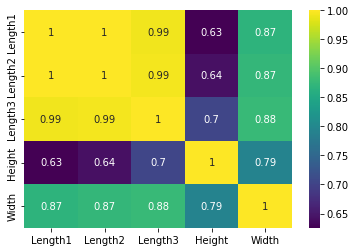

In [42]:
sns.heatmap(idv_n.corr(),annot=True,cmap="viridis")

In [43]:
shapiro_test = stats.shapiro(idv_n)
shapiro_test

ShapiroResult(statistic=0.9355983734130859, pvalue=4.989984416019003e-18)

In [44]:
s,p=shapiro(idv_n)
if p>0.05:
    print("normally distributed")
else:
    print("Not normally distributed")

Not normally distributed


<AxesSubplot:>

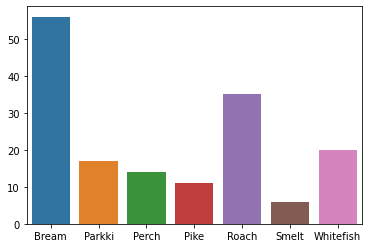

In [45]:
sns.barplot(data=idv_c,y=idv_c.value_counts(),x=idv_c.Species.unique())

In [46]:
idv_c.value_counts()

Species  
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

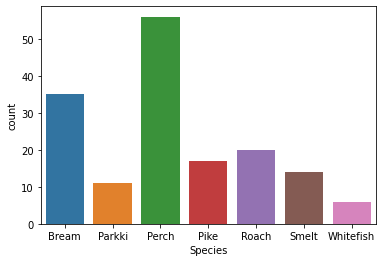

In [47]:
sns.countplot(data=idv_c,x=idv_c.Species)

In [48]:
idv_n.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [49]:
idv_n.corr()

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

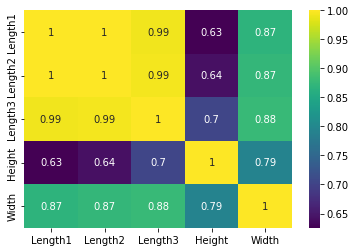

In [50]:
sns.heatmap(idv_n.corr(),annot=True,cmap="viridis")

In [51]:
for i in idv_n:
    for j in idv_n:
        r,p = pearsonr(idv_n[i],idv_n[j])
        print(f'{i} and {j} ------> {r},{p}')
        print()

Length1 and Length1 ------> 1.0,0.0

Length1 and Length2 ------> 0.9995172657489308,1.2508857741606774e-238

Length1 and Length3 ------> 0.9920309933444474,3.64503276033582e-143

Length1 and Height ------> 0.6253779191601657,1.230263724149493e-18

Length1 and Width ------> 0.8670497200958205,2.2892901129507837e-49

Length2 and Length1 ------> 0.9995172657489308,1.2508857741606774e-238

Length2 and Length2 ------> 1.0,0.0

Length2 and Length3 ------> 0.994102634753118,2.1511433096243792e-153

Length2 and Height ------> 0.640440801013453,9.89365130045729e-20

Length2 and Width ------> 0.8735466773551014,5.845981819561168e-51

Length3 and Length1 ------> 0.9920309933444474,3.64503276033582e-143

Length3 and Length2 ------> 0.994102634753118,2.1511433096243792e-153

Length3 and Length3 ------> 1.0,0.0

Length3 and Height ------> 0.7034089454175457,4.74555375827608e-25

Length3 and Width ------> 0.8785201590785152,3.0680953996533844e-52

Height and Length1 ------> 0.6253779191601657,1.23026

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(idv_n.columns)):
    print(f'{idv_n.columns[i]}------>{variance_inflation_factor(idv_n.values,i)}')

Length1------>12782.535829995173
Length2------>16598.744318125846
Length3------>3380.815906986414
Height------>76.06436362499883
Width------>92.65867230085351


In [53]:
from sklearn.model_selection import train_test_split
x = idv_n
x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [54]:
y = dv
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [55]:
# test size=33% and train size =70%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)  

(106, 5)
(53, 5)
(106,)
(53,)


In [56]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()

In [57]:
l.fit(x_train,y_train) 

LinearRegression()

In [58]:
l.coef_

array([ 81.83524718, -14.03811156, -43.00880521,  37.88630901,
        23.66875612])

In [59]:
l.intercept_

-459.371038017423

In [60]:
train_pred=l.predict(x_train)
train_pred

array([ 194.94545034,  630.91476264,  360.00485606,  163.80295941,
        213.28207682,  685.5182373 ,  368.32717027,   85.21145231,
        -75.85676868,  177.82049159,  799.68293396, -162.94813908,
         48.88912372,  731.90410227,  538.98406051,  639.74604024,
        220.87372984,  244.57946391, -165.11543311,  385.24757689,
        541.42092569,  367.00757225,  713.68453731,  161.57235086,
        199.60510637,  266.23614084,  490.55026471,  554.98664136,
       1037.68198066, -153.6663275 , -185.15331965,  104.23133424,
        548.49604392,  874.36702702,  212.11867005, -187.87726853,
        165.94827821,  271.7888201 ,  911.27471066,  917.32719414,
        186.60271945,  422.20528628,  586.39152865,  271.64028451,
       -129.19115987,  724.47975062,  680.0639255 ,  716.87977885,
        636.65026168,  533.82468778,  374.23638712,  336.39617417,
        763.57280911,  614.39860269,  746.10665643,  708.76138411,
        385.80703168,  290.63501765,   64.38049854, -170.72619

In [61]:
error=y_train-train_pred
error

46    -54.945450
20    -55.914763
104   -95.004856
89    -28.802959
92    -63.282077
         ...    
42     -3.755339
84    -10.473175
87    -34.899677
47    -48.688688
6       4.777659
Name: Weight, Length: 106, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

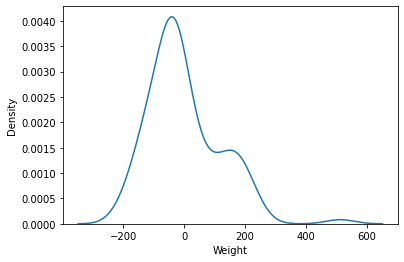

In [62]:
sns.kdeplot(error)

In [63]:
test_pred=l.predict(x_test)
test_pred

array([ 169.92516318,  -80.00053791,  690.67000442,  147.30501743,
        379.90602739,  172.70624202,   37.26459677,  665.17435122,
         43.89113494,   77.02505949,  263.3062699 ,  911.57305683,
        432.83102285,  292.04780451, 1037.68198066,  655.68751424,
        323.9731858 ,  857.02356937,  537.81755251,  147.68511989,
        208.53797002,  881.96126491,  749.17793975,  626.72815227,
        321.70949237,  555.63524332,   29.85732432,  935.108063  ,
        432.74460937,  436.89205351, -149.43536101,  652.70881009,
       1140.96258673,  326.56973173,  289.84632159,   98.40732868,
        132.81044029,  893.36751593,  463.85625609,  871.92902089,
        364.38451338,  -87.57352731, -209.69972586,  132.22944539,
        638.63899842,  -81.79038307,  798.84872323,  685.89641082,
        800.32085181,  243.80515338,  217.08989093,  870.54504652,
       -134.49071738])

In [64]:
error2=y_test-test_pred
error2

86     -49.925163
73     112.000538
27      23.329996
39     -27.305017
101   -161.906027
88     -42.706242
75      14.235403
136   -125.174351
61      11.108865
37       0.974941
99     -83.306270
126     88.426943
4       -2.831023
100    -95.047805
142    562.318019
25      69.312486
0      -81.973186
118    -37.023569
58       2.182447
43       2.314880
66     -68.537970
140     68.038735
139     20.822060
19      23.271848
69    -121.709492
11     -55.635243
36      39.142676
127     64.891937
3      -69.744609
108   -116.892054
151    159.435361
18     -42.708810
144    509.037413
52     -36.569732
56     -19.846322
79     -18.407329
82     -22.810440
34      56.632484
7      -73.856256
123    228.070979
103   -104.384513
35     127.573527
145    216.399726
41     -22.229445
134   -182.638998
158    101.690383
116    101.151277
26      34.103589
30     119.679148
67     -73.805153
65     -67.089891
32      54.454953
155    147.890717
Name: Weight, dtype: float64

In [65]:
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
mean_squared_error(train_pred,y_train)

13674.070240609828

In [67]:
np.sqrt(mean_squared_error(train_pred,y_train))     

116.93618020360434

In [68]:
r2_score(y_train,train_pred)   

0.8739906100214241

In [69]:
x_train1=sm.add_constant(x_train)
x_train1

,const,Length1,Length2,Length3,Height,Width
46,1.0,21.0,22.5,25.0,6.5500,3.3250
20,1.0,31.3,34.0,39.5,15.1285,5.5695
104,1.0,25.4,27.5,28.9,7.0516,4.3350
89,1.0,20.0,22.0,23.5,5.8750,3.5250
92,1.0,20.5,22.5,24.0,6.7920,3.6240
...,...,...,...,...,...,...
42,1.0,19.4,21.0,23.7,6.1146,3.2943
84,1.0,19.0,21.0,22.5,5.6925,3.6675
87,1.0,20.0,22.0,23.5,5.6400,3.5250
47,1.0,21.1,22.5,25.0,6.4000,3.8000


In [70]:
model=sm.OLS(y_train,x_train1).fit()

In [71]:
residuals=model.resid
residuals

46    -54.945450
20    -55.914763
104   -95.004856
89    -28.802959
92    -63.282077
         ...    
42     -3.755339
84    -10.473175
87    -34.899677
47    -48.688688
6       4.777659
Length: 106, dtype: float64

<AxesSubplot:>

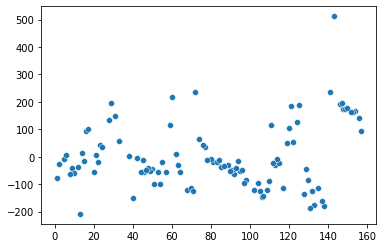

In [72]:
sns.scatterplot(data=model.resid)

<AxesSubplot:>

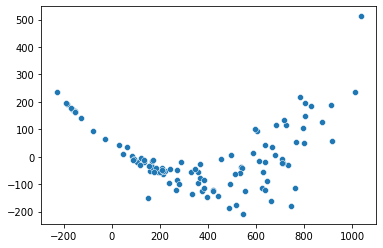

In [73]:
sns.scatterplot(x=train_pred,y=residuals)

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.37e-43
Time:                        08:18:28   Log-Likelihood:                -655.14
No. Observations:                 106   AIC:                             1322.
Df Residuals:                     100   BIC:                             1338.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -459.3710     36.999    -12.416      0.000    -532.775    -385.967
Length1       81.8352     47.519      1.722      0.088     -12.440     176.111
Length2      -14.0381     47.727     -0.294      0.769    -108.727      80.651
Length3      -43.0088     20.401     -2.108      0.038     -83.483      -2.534
Height        37.8863     10.607      3.572      0.001      16.843      58.930
Width         23.6688     24.640      0.961      0.339     -25.217      72.554
==============================================================================
Omnibus:                       25.920   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.044
Skew:                           1.098   Prob(JB):                     1.22e-09
Kurtosis:                       5.115   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
x_train2=x_train1.drop(labels='Length2',axis=1)
sm.OLS(y_train,sm.add_constant(x_train2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     175.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.75e-44
Time:                        08:18:28   Log-Likelihood:                -655.19
No. Observations:                 106   AIC:                             1320.
Df Residuals:                     101   BIC:                             1334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -460.6951     36.557    -12.602      0.000    -533.215    -388.175
Length1       69.4149     21.694      3.200      0.002      26.381     112.449
Length3      -45.0473     19.101     -2.358      0.020     -82.938      -7.157
Height        38.0618     10.542      3.611      0.000      17.150      58.974
Width         21.5130     23.418      0.919      0.360     -24.943      67.969
==============================================================================
Omnibus:                       25.470   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.380
Skew:                           1.094   Prob(JB):                     2.81e-09
Kurtosis:                       5.032   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Mean Score of the model at 95% confidence level.

In [76]:
l.score(x,y)

0.8793168761817926

### Compare real and predicted weights and give a conclusion statement based on it?

In [77]:
d=pd.DataFrame({'Actual':y_test,'Predicted': test_pred,'Errors':error2})
d

,Actual,Predicted,Errors
86,120.0,169.925163,-49.925163
73,32.0,-80.000538,112.000538
27,714.0,690.670004,23.329996
39,120.0,147.305017,-27.305017
101,218.0,379.906027,-161.906027
88,130.0,172.706242,-42.706242
75,51.5,37.264597,14.235403
136,540.0,665.174351,-125.174351
61,55.0,43.891135,11.108865
37,78.0,77.025059,0.974941
